<a href="https://colab.research.google.com/github/Valeeew/Analyze-bookstore-sales/blob/turnover/Turnover_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse du CA
## Par Valentin MONTEIRO

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install Valeeew
from valeeew import cleaning as cl

In [7]:
!git clone -l -s git://github.com/Valeeew/Analyze-bookstore-sales cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 26 (delta 14), reused 13 (delta 5), pack-reused 0
Receiving objects: 100% (26/26), 17.81 MiB | 3.30 MiB/s, done.
Resolving deltas: 100% (14/14), done.
/content/cloned-repo/cloned-repo
 customers.csv		 products.csv	       transactions.csv
'DATA_library (1).csv'	 Sales_analyze.ipynb


In [8]:
df = pd.read_csv("DATA_library (1).csv", index_col="date", parse_dates=True)

In [9]:
df

,Unnamed: 0,id_prod,session_id,client_id,price,categ,sex,birth,age,class_age
date,,,,,,,,,,
2022-05-20 13:21:29.043970,0,0_1518,s_211425,c_103,4.18,0.0,f,1986,37,35-39
2022-06-18 05:55:31.816994,1,0_1627,s_225494,c_103,3.99,0.0,f,1986,37,35-39
2023-02-08 17:31:06.898425,2,0_1104,s_338755,c_103,13.21,0.0,f,1986,37,35-39
2021-04-20 06:18:39.939761,3,0_1390,s_23078,c_103,19.37,0.0,f,1986,37,35-39
2022-03-15 19:54:53.904123,4,0_1547,s_179629,c_103,8.99,0.0,f,1986,37,35-39
...,...,...,...,...,...,...,...,...,...,...
2021-05-15 08:17:35.835342,679327,0_1509,s_34762,c_8114,4.99,0.0,m,1962,61,60-64
2021-11-08 17:12:27.637349,679328,1_152,s_116675,c_240,11.06,1.0,m,1998,25,25-29
2021-06-01 04:31:16.088314,679329,2_207,s_42418,c_305,50.99,2.0,f,1996,27,25-29


### Objectifs :

> - Indicateurs et graphiques autour du chiffre d'affaires.
- Évolution dans le temps et mise en place d'une décomposition en moyenne mobile pour évaluer la tendance globale
- Zoom sur les références:
 - tops et les flops
 - la répartition par catégorie
- Repérer des informations sur les profils des clients:
 - la répartition du chiffre d'affaires entre eux, via par exemple une courbe de Lorenz.
- Après, toutes les informations et tous graphiques qui apporteraient de l’information pertinente sont les bienvenus !

chiffre d'affaire total : 11856079.719559556
                     sum
date                    
2021-12-31  4.771752e+06
2022-12-31  6.109958e+06
2023-12-31  9.743692e+05


<function matplotlib.pyplot.show>

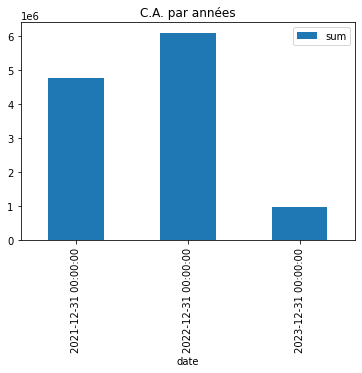

In [10]:
# Calcul du CA total
print("chiffre d'affaire total :", df.price.sum())
# Calcul du CA / années
turnover_annuel = df.price.resample('Y').agg(["sum"])
print(turnover_annuel)
# Graphique du CA / années
turnover_annuel.plot(kind="bar")
plt.title("C.A. par années")
plt.show

<function matplotlib.pyplot.show>

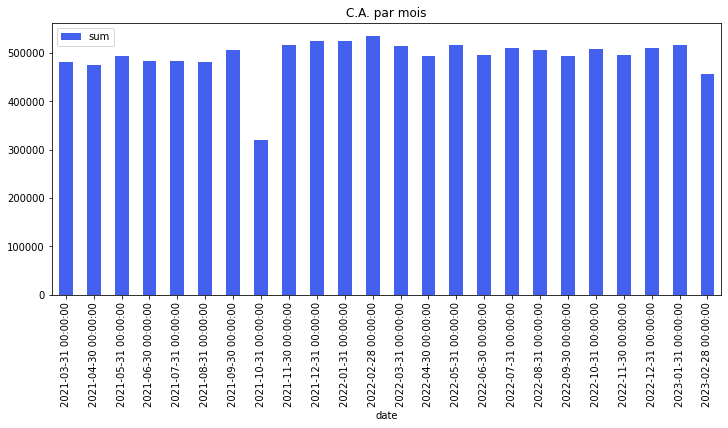

In [11]:
# Il n'y qu'une seul année complète, le graphique au dessus n'est pas suffisant
turnover_mensuel = df.price.resample('M').agg(["sum"])
turnover_mensuel.plot(kind="bar", figsize=(12,5), color="#4361ee")
plt.title("C.A. par mois")
plt.show

> ## __Analyse des Catégories__

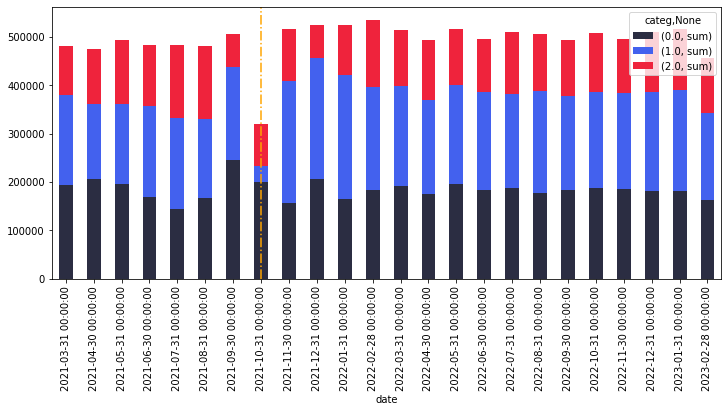

In [12]:
from IPython.core.pylabtools import figsize
c = ["#2b2d42", "#4361ee", "#ef233c"]
turnover_categ = pd.pivot_table(df,index=df.index, columns="categ", values="price", aggfunc={"price":"sum"})
turnover_categ_m = turnover_categ.resample('M').agg(["sum"])
turnover_categ_m.plot(kind="bar",stacked = True, figsize=(12,5), color=c)
plt.axvline(7, color="orange", linestyle="-.")


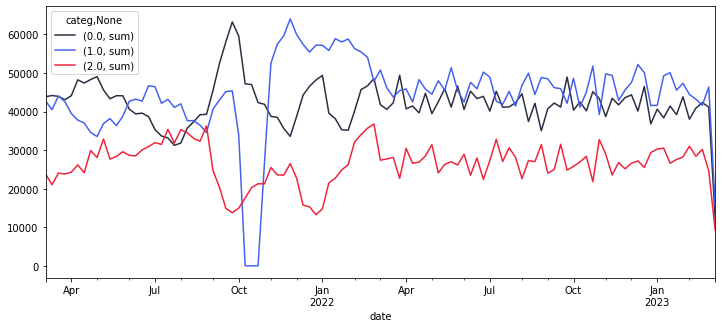

In [13]:
turnover_categ_w = turnover_categ.resample('W').agg(["sum"])
#turnover_categ_w
turnover_categ_w.plot(kind="line", figsize=(12,5), color=c)

### Anomalie d'octobre 2021

Text(0.5, 1.0, 'C.A. par categorie en octobre 2021')

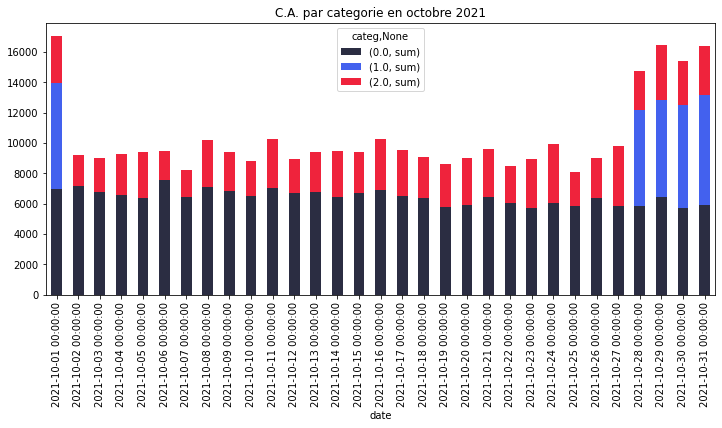

In [14]:
turnover_categ_octobre21 = turnover_categ.loc["2021-10"].resample('D').agg(["sum"])
turnover_categ_octobre21.plot(kind="bar",stacked = True, figsize=(12,5), color=c)
plt.title("C.A. par categorie en octobre 2021")

> ## __Analyse des clients__

In [15]:
print("Nombre de clients : \n", df.client_id.unique().shape)

Nombre de clients : 
 (8600,)


In [16]:
# Calcul du CA générer par client
turnover_client = df.groupby("client_id")[["price"]].sum()
turnover_client

,price
client_id,
c_1,558.18
c_10,1353.60
c_100,254.85
c_1000,2261.89
c_1001,1812.86
...,...
c_995,189.41
c_996,1625.58
c_997,1490.01


In [17]:
turnover_client.describe()

,price
count,8600.000000
mean,1378.613921
std,5182.880942
min,6.310000
25%,547.885000
50%,1027.210000
75%,1779.785000
max,324033.350000


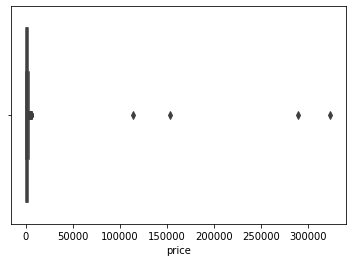

In [18]:
# Un oulier apparait clairement en max, je vais donc en rechercher d'autre
sns.boxplot(x = turnover_client.price)

In [19]:
# 4 clients ont l'air de se démarquer des autres je vérifie dans mon dataframe
turnover_client.sort_values("price", ascending = False)

,price
client_id,
c_1609,324033.350000
c_4958,289760.340000
c_6714,153662.749128
c_3454,113669.844564
c_3263,5276.870000
...,...
c_4648,11.200000
c_240,11.060000
c_8114,9.980000


In [20]:
turnover_retailers = turnover_client.loc[turnover_client["price"]>5300]
turnover_retailers = turnover_retailers.sum()

In [21]:
# créatiton d'un dataframe pour les 4 plus gros client
c1609 = df[(df.client_id =="c_1609")==True]
c3454 = df[(df.client_id =="c_3454")==True]
c4958 = df[(df.client_id =="c_4958")==True]
c6714 = df[(df.client_id =="c_6714")==True]
# création d'une table pivot pour analyse du CA par catégorie
c1609 = pd.pivot_table(c1609,index=c1609.index, columns="categ", values="price", aggfunc={"price":"sum"})
c3454 = pd.pivot_table(c3454,index=c3454.index, columns="categ", values="price", aggfunc={"price":"sum"})
c4958 = pd.pivot_table(c4958,index=c4958.index, columns="categ", values="price", aggfunc={"price":"sum"})
c6714 = pd.pivot_table(c6714,index=c6714.index, columns="categ", values="price", aggfunc={"price":"sum"})
# resample par mois
c1609 = c1609.resample('M').agg(["sum"])
c3454 = c3454.resample('M').agg(["sum"])
c4958 = c4958.resample('M').agg(["sum"])
c6714 = c6714.resample('M').agg(["sum"])

<function matplotlib.pyplot.show>

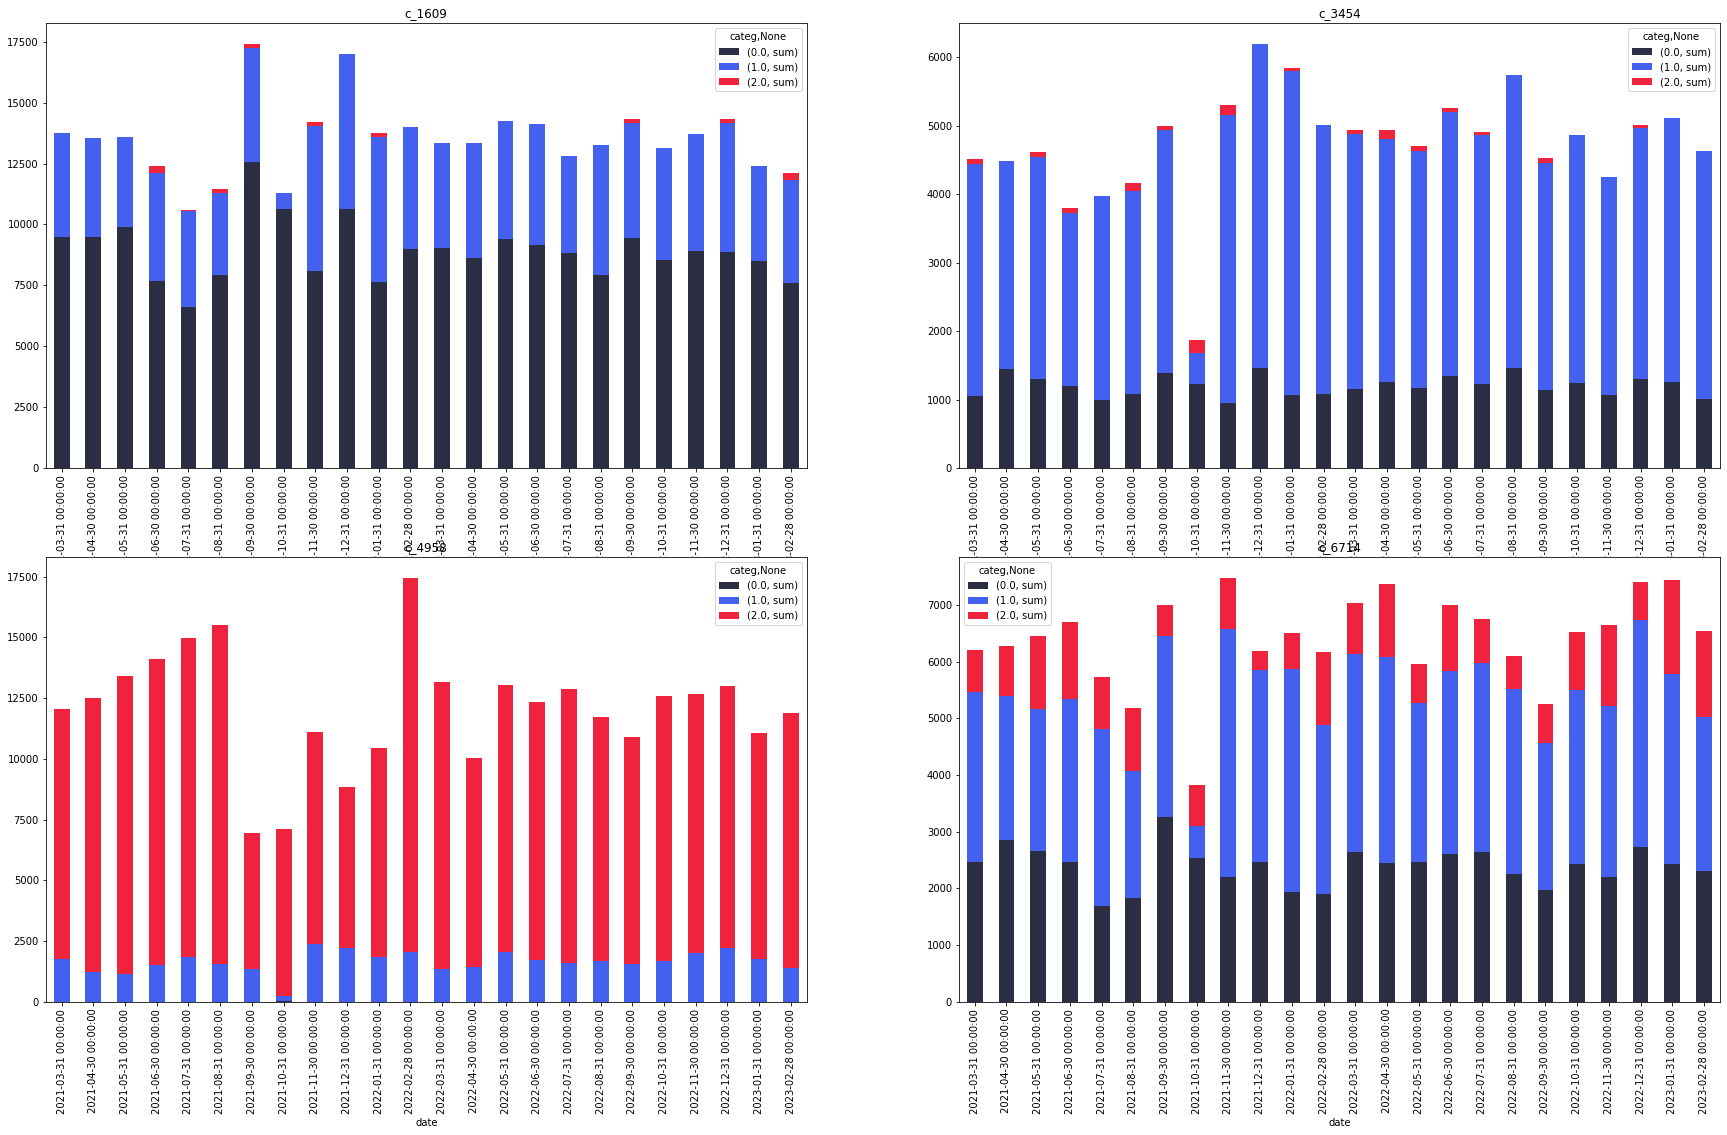

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[30,18])
c1609.plot(kind="bar", stacked=True, color=c, ax=axes[0,0]);axes[0,0].set_title("c_1609")
c3454.plot(kind="bar", stacked=True, color=c, ax=axes[0,1]);axes[0,1].set_title("c_3454")
c4958.plot(kind="bar", stacked=True, color=c, ax=axes[1,0]);axes[1,0].set_title("c_4958")
c6714.plot(kind="bar", stacked=True, color=c, ax=axes[1,1]);axes[1,1].set_title("c_6714")
plt.show

Text(0.5, 1.0, 'Proportion du C.A.')

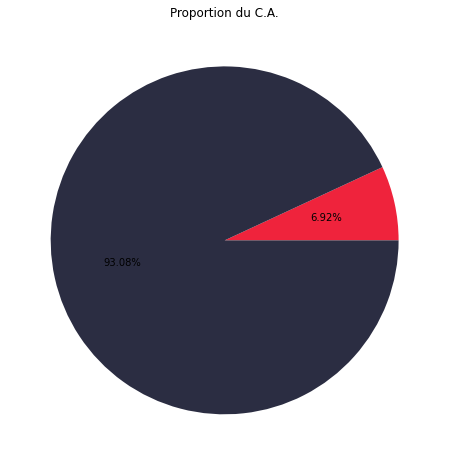

In [23]:
plt.figure(figsize=[8,8])
plt.pie([turnover_retailers,df.price.sum()], colors=["#ef233c", "#2b2d42"],autopct = lambda x: str(round(x, 2)) + '%')
plt.title("Proportion du C.A.")